In [25]:
import pandas as pd
from lamp_flask import db
words = pd.read_sql_query('select * from word',db.engine,parse_dates=['timestamp','forwardedAt'])
rqst = pd.read_sql_query('select * from lamp_request', db.engine, parse_dates='requestedAt')
min_words = words.groupby([pd.Grouper(key='forwardedAt',freq='60s')]).size().rename('Words forwarded').to_frame()
min_rqst = rqst.groupby(['lamp_name', pd.Grouper(key='requestedAt', freq='60s')]).size().unstack('lamp_name')
times = min_rqst.merge(min_words,left_index=True,right_index=True,how='outer')

In [26]:
' '.join([str(word) for word in words.word])

'SOS VTK HLE HOU X ADYREL ELOU JOUDA JOUDA SOMETHING MORESOVKA JOUDA QWERTYUIOPASDFGHJKLZXCVBNMQWERTY'

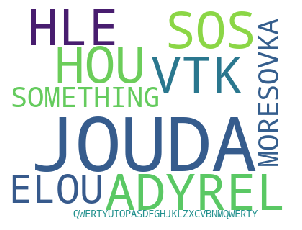

In [27]:
from wordcloud import WordCloud 

def generateWordCloud(series)
    wordcloud = WordCloud(width = 400, height =300, 
                    background_color ='white', 
                    stopwords = [], 
                    min_font_size = 10).generate(' '.join([str(word) for word in series])) 
    ax.imshow(wordcloud) 
    ax.set_axis_off() 



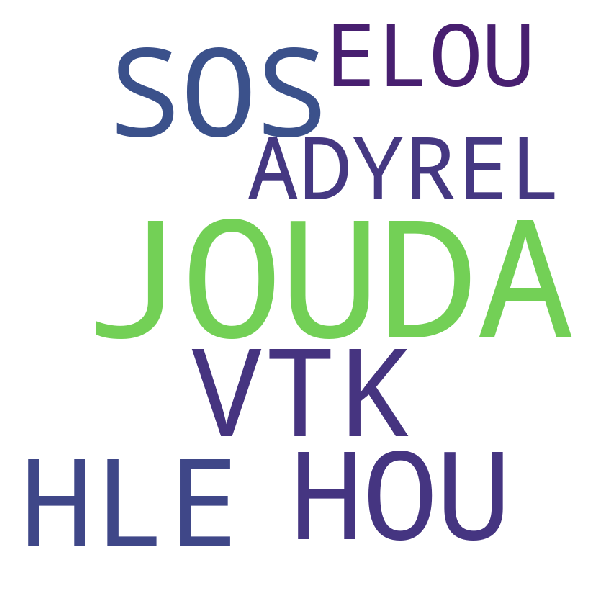

In [33]:
axs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f95ecd9df60>,
      dtype=object)

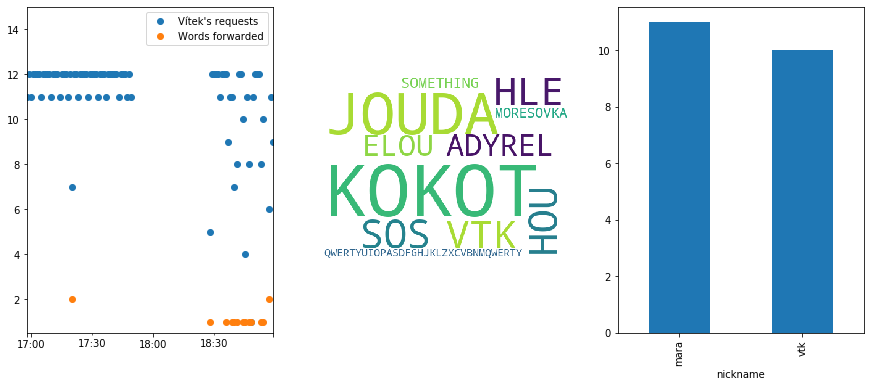

In [38]:
def generateWordCloud(series,ax):
    wordcloud = WordCloud(width = 400, height =300, 
                    background_color ='white', 
                    stopwords = [], 
                    min_font_size = 10).generate(' '.join([str(word) for word in series])) 
    ax.imshow(wordcloud) 
    ax.set_axis_off() 


fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15,6))

words = pd.read_sql_query('select * from word',db.engine,parse_dates=['timestamp','forwardedAt'])
rqst = pd.read_sql_query('select * from lamp_request', db.engine, parse_dates='requestedAt')
min_words = words.groupby([pd.Grouper(key='forwardedAt',freq='60s')]).size().rename('Words forwarded').to_frame()
min_rqst = rqst.groupby(['lamp_name', pd.Grouper(key='requestedAt', freq='60s')]).size().unstack('lamp_name').rename({'vitek':"Vítek's requests",'hell':"Helena's requests"},axis=1)
times = min_rqst.merge(min_words,left_index=True,right_index=True,how='outer')
times.plot(ax=axs[0],marker='o',linewidth=0,ylim=(0.5,15))

generateWordCloud(words.word,axs[1])
words.groupby('nickname').size().plot.bar(ax=axs[2])
